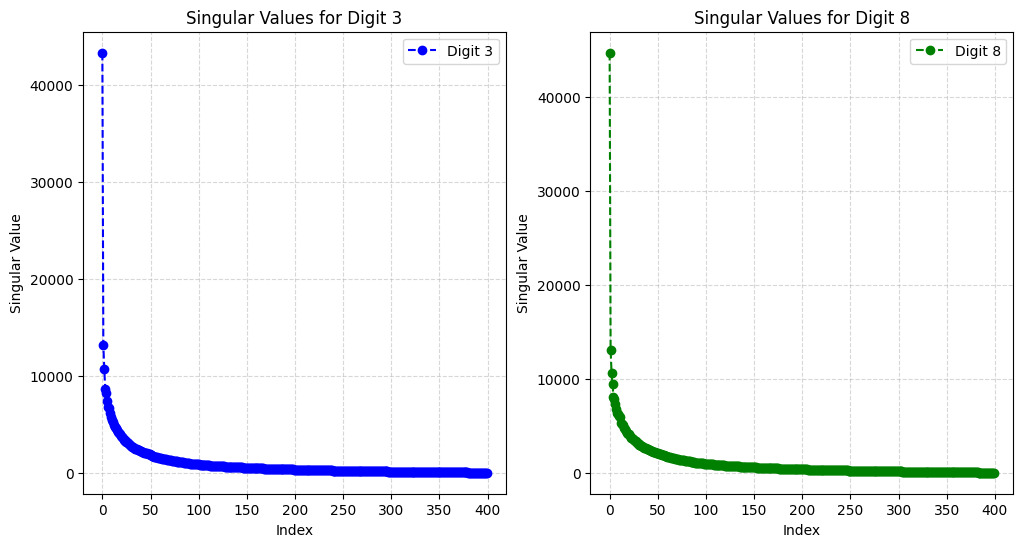

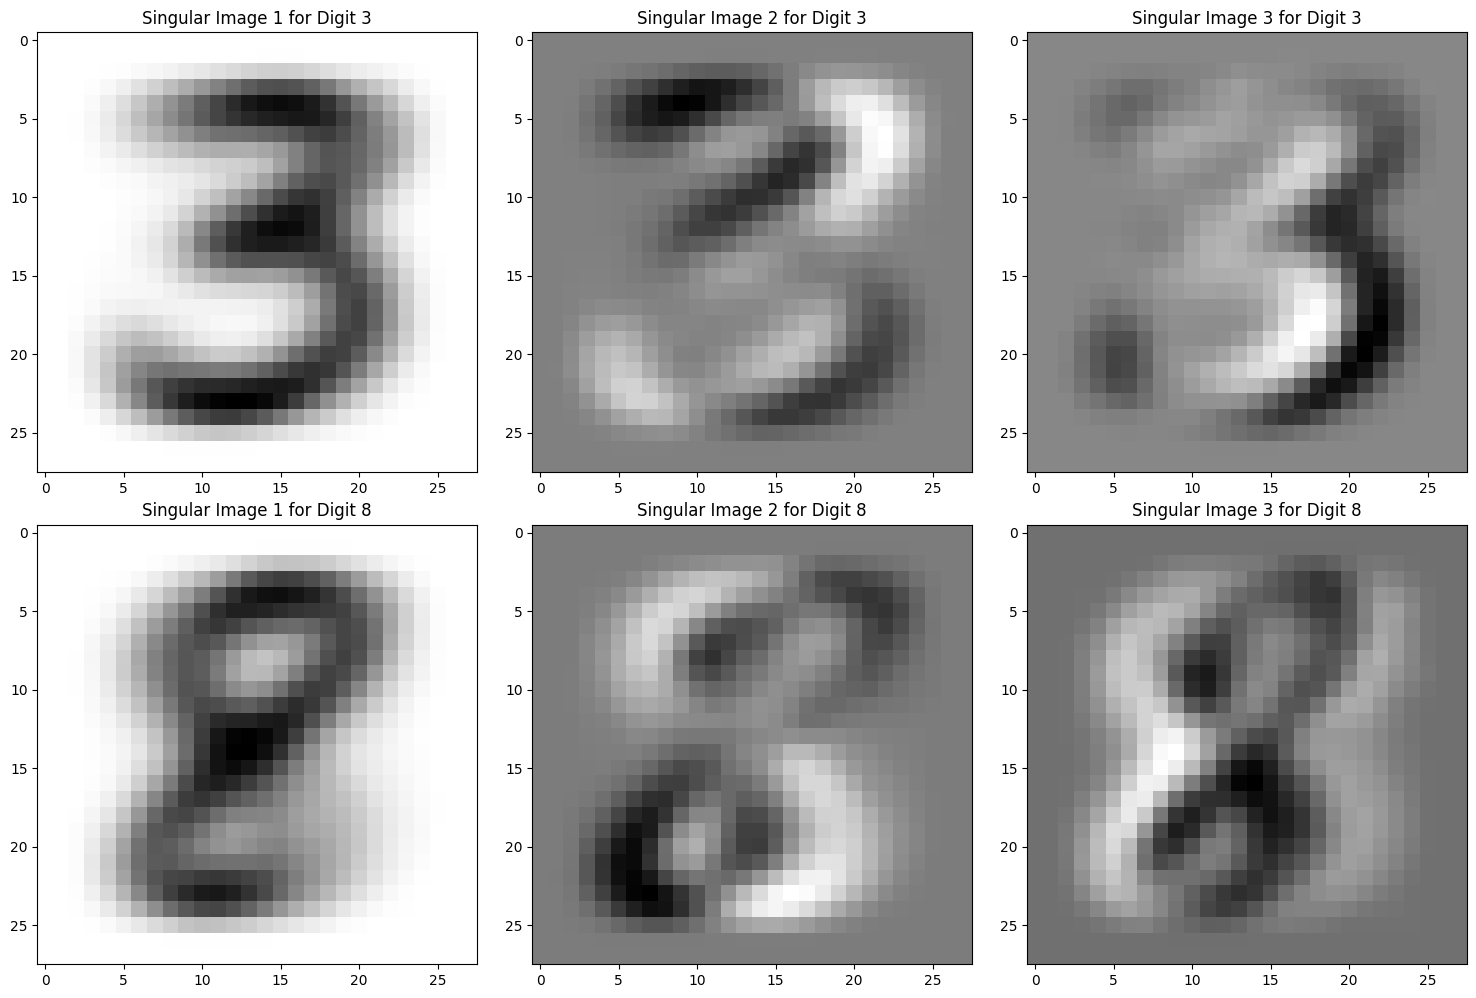

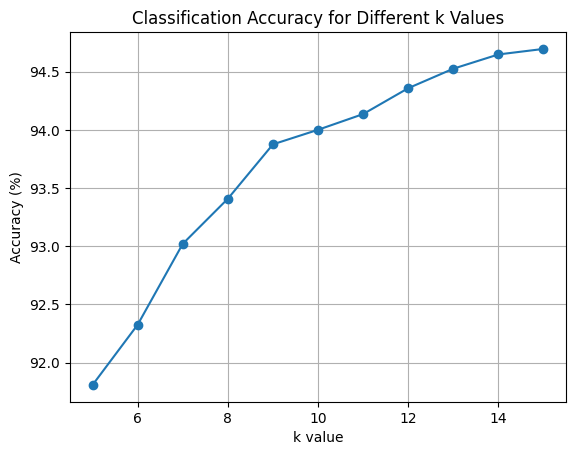

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Load data
train_digits = np.load('TrainDigits.npy')  # Training images
train_labels = np.load('TrainLabels.npy')  # Labels for training images
test_digits = np.load('TestDigits.npy')    # Test images
test_labels = np.load('TestLabels.npy')    # Labels for test images

# Parameters setting
num_cols = 400  # Number of columns to use from each digit matrix
num_digits = 10  # Total number of digits (0-9)
k_range = range(5, 16)  # Range of k values for SVD

# Create training matrices for each digit and compute SVD
training_matrices = {digit: train_digits[:, (train_labels == digit).flatten()][:, :num_cols]
                     for digit in range(num_digits)}
svd_components = {digit: np.linalg.svd(matrix, full_matrices=False)
                  for digit, matrix in training_matrices.items()}
U_k_list = [svd_components[digit][0][:, :k_range[-1]]
            for digit in range(num_digits)]

# Function to plot singular values for selected digits
def plot_singular_values(digit, color, label):
    singular_values = svd_components[digit][1]  # Extract singular values
    plt.plot(singular_values, marker='o', linestyle='--', color=color, label=label)
    plt.xlabel('Index')
    plt.ylabel('Singular Value')
    plt.title(f'Singular Values for Digit {digit}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

# Plotting singular values for digits 3 and 8
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_singular_values(3, 'blue', 'Digit 3')
plt.subplot(1, 2, 2)
plot_singular_values(8, 'green', 'Digit 8')
plt.show()

# Function to plot singular images for a digit
def plot_singular_images(digit, start_subplot):
    for i in range(3):  # Display first 3 singular images
        plt.subplot(2, 3, start_subplot + i)
        singular_image = svd_components[digit][0][:, i].reshape(28, 28).T  # Reshape singular vector into image
        plt.imshow(singular_image, cmap='gray')
        plt.title(f'Singular Image {i+1} for Digit {digit}')

# Plotting singular images for digits 3 and 8
plt.figure(figsize=(15, 10))
plot_singular_images(3, 1)
plot_singular_images(8, 4)
plt.tight_layout()
plt.show()

# Compute classification accuracy for each k
accuracy_k = []
for k in k_range:
    # Initialize matrix to store residuals for each digit
    residuals_matrix = np.zeros((num_digits, test_digits.shape[1]))
    for digit in range(num_digits):
        U_k = U_k_list[digit][:, :k]  # Use first k columns of U
        # Compute residuals for each test image
        residuals = np.linalg.norm(test_digits - U_k @ U_k.T @ test_digits, axis=0)
        residuals_matrix[digit] = residuals
    # Find the digit with the smallest residual for each test image
    predictions = np.argmin(residuals_matrix, axis=0)
    # Calculate accuracy as the percentage of correct predictions
    accuracy = np.mean(test_labels[0] == predictions) * 100
    accuracy_k.append(accuracy)

# Plot accuracy versus k values
plt.plot(k_range, accuracy_k, marker='o')
plt.xlabel('k value')
plt.ylabel('Accuracy (%)')
plt.title('Classification Accuracy for Different k Values')
plt.grid(True)
plt.show()